In [1]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

In [2]:
#Generate dataset
import cv2
import csv
import glob
import numpy as np

# Create CSV file
data_np = np.array(mnist.data)
target_np = np.array(mnist.target)

# Create CSV file
header = ["label"]
for i in range(784):
    header.append("pixel" + str(i))

with open('mnist_dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Convert and write MNIST data to CSV
for i in range(len(data_np)):
    label = target_np[i]
    data = [label]
    for pixel in data_np[i]:
        data.append(pixel)
    with open('mnist_dataset.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [3]:
import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv('mnist_dataset.csv')

data = shuffle(data)

X = data.drop("label", axis=1)
Y = data["label"]

print("Shape of features (X):", X.shape)
print("Shape of labels (Y):", Y.shape)



Shape of features (X): (70000, 784)
Shape of labels (Y): (70000,)


In [4]:
print(X.index)

Index([39413,  6337, 21305, 29890, 26890, 21460, 64349, 30997, 68469, 44589,
       ...
       28889,  2551, 55899,  3569, 56588, 48848, 15673, 52985, 61603, 21473],
      dtype='int64', length=70000)


8


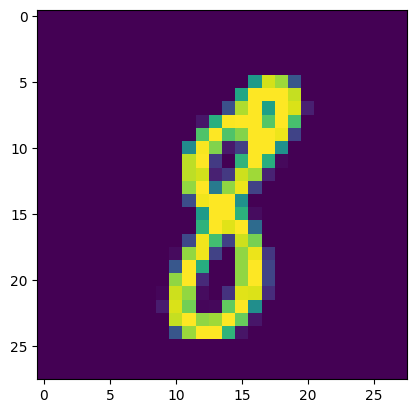

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 300
img = X.loc[idx].values.reshape(28,28).astype(float)
print(Y[idx])
plt.imshow(img)

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import joblib


if not os.path.exists("model"):
    os.makedirs("model")

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8)

train_x = train_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

train_x = np.squeeze(train_x)
test_x = np.squeeze(test_x)

classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x, train_y)

joblib.dump(classifier, "model/bestmodel.keras")

prediction = classifier.predict(test_x)

accuracy = metrics.accuracy_score(prediction, test_y)
print("Accuracy =", accuracy)



Accuracy = 0.9184464285714286


C:\Users\niraj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


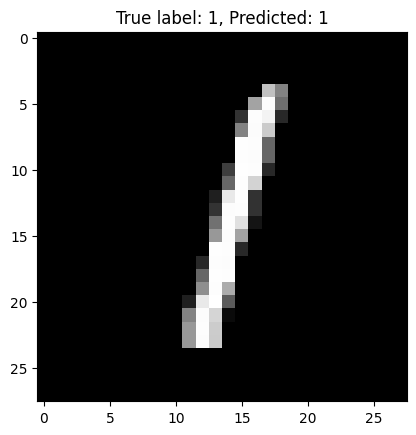

In [10]:
# Function to predict and display a particular index
def predict_and_display(index):
    if index >= len(test_x):
        print("Index out of range.")
        return
    
    image = test_x.iloc[index].values.reshape(28, 28)  # Convert pandas Series to numpy array and reshape
    label = test_y.iloc[index]

    prediction = classifier.predict([image.flatten()])[0]

    plt.imshow(image, cmap='gray')
    plt.title(f"True label: {label}, Predicted: {prediction}")
    plt.show()

# Example usage: predict and display the image at index 31172
predict_and_display(1579)


In [1]:
#interfacing with raspberrypi3  and Webcam
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load("model/digit_recognizer")

# Initialize the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to access the webcam.")
    exit()

# Capture a frame from the webcam
ret, frame = cap.read()

if not ret:
    print("Error: Failed to capture frame from the webcam.")
    exit()

# Convert the frame to grayscale
im_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

# Threshold the image
_, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

# Invert the image (digits in the dataset are white on black background)
roi = cv2.bitwise_not(roi)

# Reshape the image to match the input shape of the model
X = roi.reshape(1, -1).astype(np.float32) / 255

prediction = model.predict(X)

# Display the frame with the predicted digit
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Digit: {prediction[0]}")
plt.axis('off')
plt.show()

# Release the webcam
cap.release()
